## 1. Download all the Data

In [2]:
import yfinance as yf
from datetime import datetime, timedelta

# Define the tickers
tickers = ['BTC-USD', 'ETH-USD', 'GC=F', 'DX-Y.NYB', '^GSPC', '^IXIC']

# Define the start and end dates
end_date = datetime.now()
start_date = end_date - timedelta(days=4*365)

# Download the data
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
#for ticker, df in data.items():
#    print(f"\nData for {ticker}:")
#    display(df)


In [6]:
for ticker, df in data.items():
    print(f"\nFirst 5 rows of data for {ticker}:")
    print(df.head())



First 5 rows of data for BTC-USD:
                    Open          High           Low         Close  \
Date                                                                 
2019-07-13  11813.126953  11841.957031  10908.479492  11392.378906   
2019-07-14  11381.020508  11451.204102  10234.576172  10256.058594   
2019-07-15  10257.838867  11052.766602   9992.006836  10895.089844   
2019-07-16  10896.653320  10996.632812   9448.106445   9477.641602   
2019-07-17   9471.213867   9963.134766   9163.134766   9693.802734   

               Adj Close       Volume  
Date                                   
2019-07-13  11392.378906  21042616384  
2019-07-14  10256.058594  22486000001  
2019-07-15  10895.089844  25384047207  
2019-07-16   9477.641602  24151199070  
2019-07-17   9693.802734  24569921549  

First 5 rows of data for ETH-USD:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-07-13 

In [8]:
import pandas as pd

# Extract 'Close' prices and concatenate into one DataFrame
close_prices = pd.concat([df['Close'].rename(ticker) for ticker, df in data.items()], axis=1)

print(close_prices)


                 BTC-USD      ETH-USD         GC=F    DX-Y.NYB        ^GSPC  \
Date                                                                          
2019-07-13  11392.378906   269.458801          NaN         NaN          NaN   
2019-07-14  10256.058594   227.578064          NaN         NaN          NaN   
2019-07-15  10895.089844   229.776001  1411.400024   96.930000  3014.300049   
2019-07-16   9477.641602   199.188675  1409.199951   97.400002  3004.040039   
2019-07-17   9693.802734   211.484970  1421.300049   97.220001  2984.419922   
...                  ...          ...          ...         ...          ...   
2023-07-08  30292.541016  1865.539551          NaN         NaN          NaN   
2023-07-09  30171.234375  1863.009766          NaN         NaN          NaN   
2023-07-10  30414.470703  1880.556396  1925.000000  101.970001  4409.529785   
2023-07-11  30620.951172  1878.336060  1931.300049  101.730003  4439.259766   
2023-07-12  30717.001953  1889.223145  1939.699951  

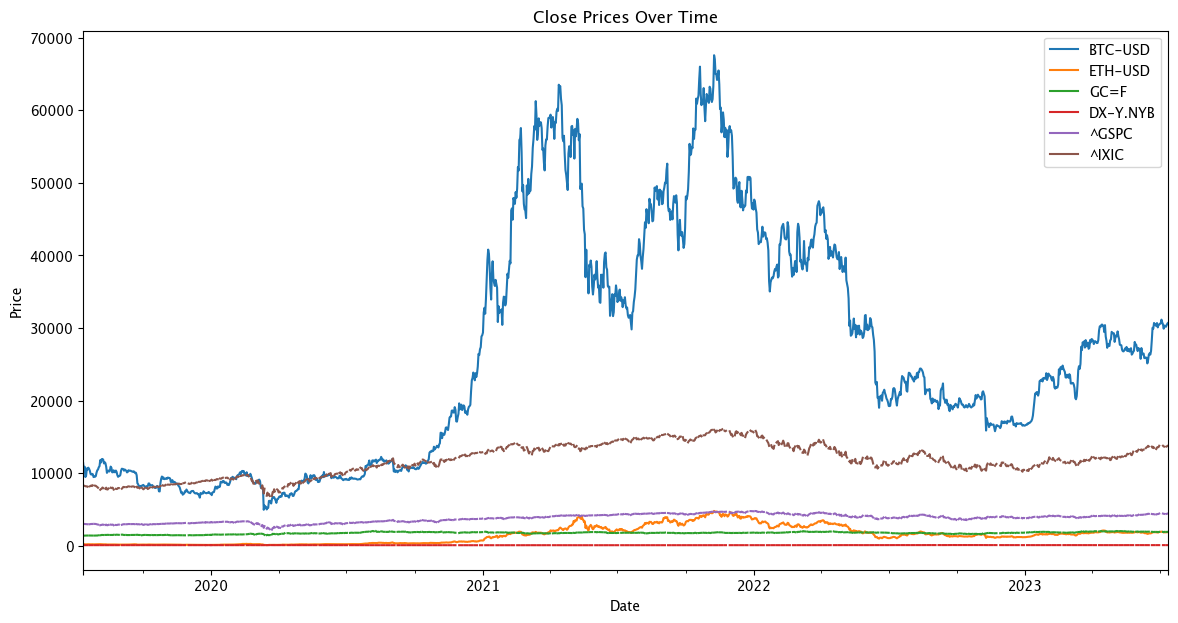

In [9]:
import matplotlib.pyplot as plt

close_prices.plot(figsize=(14, 7))
plt.title('Close Prices Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()


In [14]:
# Calculate relative price changes
relative_changes = close_prices / close_prices.iloc[0] - 1

# Forward-fill missing data
close_prices_filled = close_prices.ffill()

# Calculate relative price changes
relative_changes = close_prices_filled / close_prices_filled.iloc[0] - 1

print(relative_changes)


             BTC-USD   ETH-USD  GC=F  DX-Y.NYB  ^GSPC  ^IXIC
Date                                                        
2019-07-13  0.000000  0.000000   NaN       NaN    NaN    NaN
2019-07-14 -0.099744 -0.155425   NaN       NaN    NaN    NaN
2019-07-15 -0.043651 -0.147269   NaN       NaN    NaN    NaN
2019-07-16 -0.168072 -0.260782   NaN       NaN    NaN    NaN
2019-07-17 -0.149098 -0.215149   NaN       NaN    NaN    NaN
...              ...       ...   ...       ...    ...    ...
2023-07-08  1.659018  5.923283   NaN       NaN    NaN    NaN
2023-07-09  1.648370  5.913895   NaN       NaN    NaN    NaN
2023-07-10  1.669721  5.979013   NaN       NaN    NaN    NaN
2023-07-11  1.687845  5.970773   NaN       NaN    NaN    NaN
2023-07-12  1.696276  6.011176   NaN       NaN    NaN    NaN

[1461 rows x 6 columns]


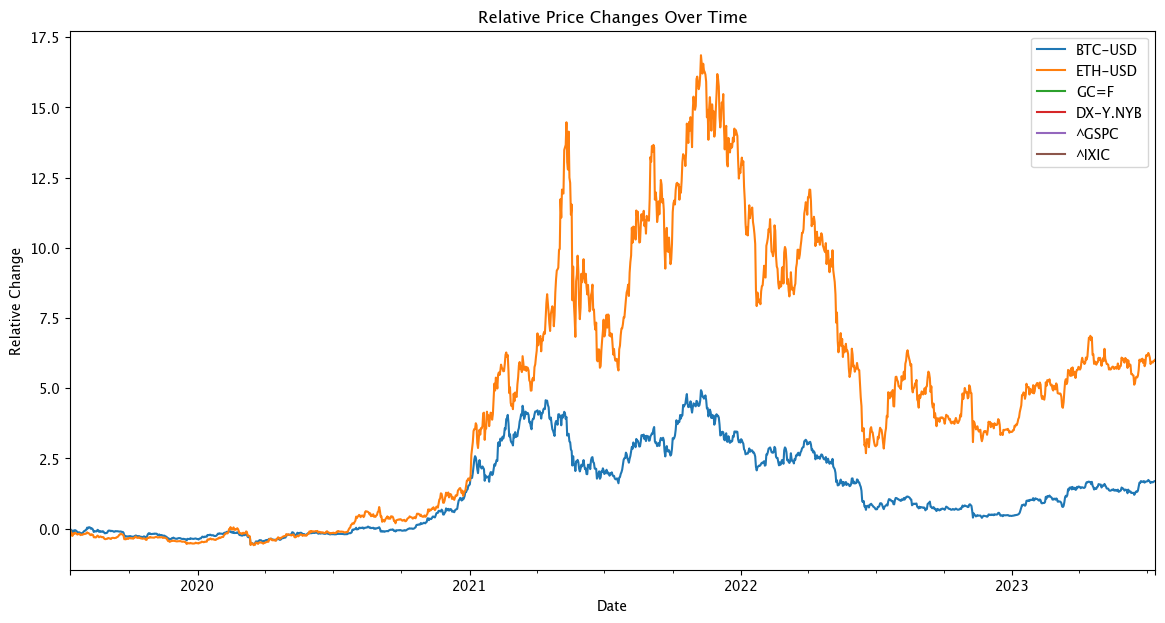

In [11]:
relative_changes.plot(figsize=(14, 7))
plt.title('Relative Price Changes Over Time')
plt.ylabel('Relative Change')
plt.xlabel('Date')
plt.show()


In [12]:
# Forward-fill missing data
close_prices_filled = close_prices.ffill()

# Calculate relative price changes
relative_changes = close_prices_filled / close_prices_filled.iloc[0] - 1

print(relative_changes)


             BTC-USD   ETH-USD  GC=F  DX-Y.NYB  ^GSPC  ^IXIC
Date                                                        
2019-07-13  0.000000  0.000000   NaN       NaN    NaN    NaN
2019-07-14 -0.099744 -0.155425   NaN       NaN    NaN    NaN
2019-07-15 -0.043651 -0.147269   NaN       NaN    NaN    NaN
2019-07-16 -0.168072 -0.260782   NaN       NaN    NaN    NaN
2019-07-17 -0.149098 -0.215149   NaN       NaN    NaN    NaN
...              ...       ...   ...       ...    ...    ...
2023-07-08  1.659018  5.923283   NaN       NaN    NaN    NaN
2023-07-09  1.648370  5.913895   NaN       NaN    NaN    NaN
2023-07-10  1.669721  5.979013   NaN       NaN    NaN    NaN
2023-07-11  1.687845  5.970773   NaN       NaN    NaN    NaN
2023-07-12  1.696276  6.011176   NaN       NaN    NaN    NaN

[1461 rows x 6 columns]


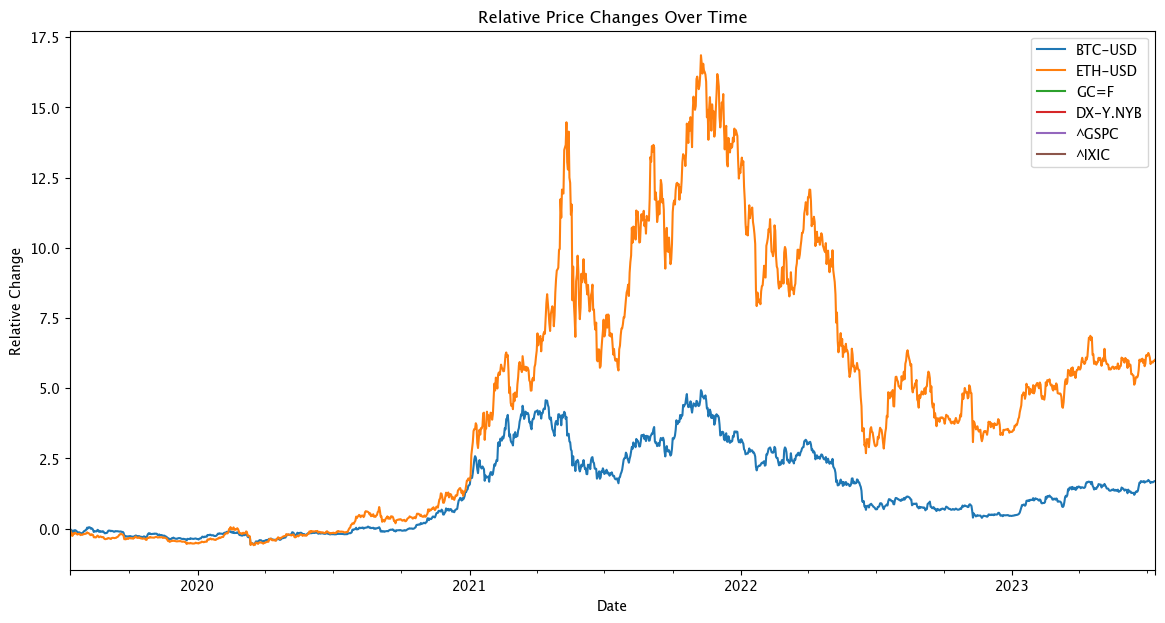

In [13]:
relative_changes.plot(figsize=(14, 7))
plt.title('Relative Price Changes Over Time')
plt.ylabel('Relative Change')
plt.xlabel('Date')
plt.show()
